Upload the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trainer_schedule_report.csv to trainer_schedule_report.csv


Load the Dataset

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('trainer_schedule_report.csv',sep=';')


Data Exploration

In [ ]:
# Display first few rows
df.head()

,"s.no,academic_year,branch_id,branch_name,college_type,sem,college_id,college_code,college_name,venue,college_schedule_type,skill_offering_id,course_name,training_partner_id,training_partner_name,planned_week,session1_date,session1_time,session1_duration,session1_trainer,session1_trainer_profile,session1_head_count,session1_status,session2_date,session2_time,session2_duration,session2_trainer,session2_trainer_profile,session2_head_count,session2_status"
0,"1,2024-2025,37,B.Tech Information Technology,,..."
1,"2,2024-2025,37,B.Tech Information Technology,,..."
2,"3,2024-2025,37,B.Tech Information Technology,,..."
3,"4,2024-2025,37,B.Tech Information Technology,,..."
4,"5,2024-2025,37,B.Tech Information Technology,,..."


Check for Missing Values and Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicate rows:",df.duplicated().sum())

s.no,academic_year,branch_id,branch_name,college_type,sem,college_id,college_code,college_name,venue,college_schedule_type,skill_offering_id,course_name,training_partner_id,training_partner_name,planned_week,session1_date,session1_time,session1_duration,session1_trainer,session1_trainer_profile,session1_head_count,session1_status,session2_date,session2_time,session2_duration,session2_trainer,session2_trainer_profile,session2_head_count,session2_status    0
dtype: int64
Duplicate rows: 0


Visualize a Few Features

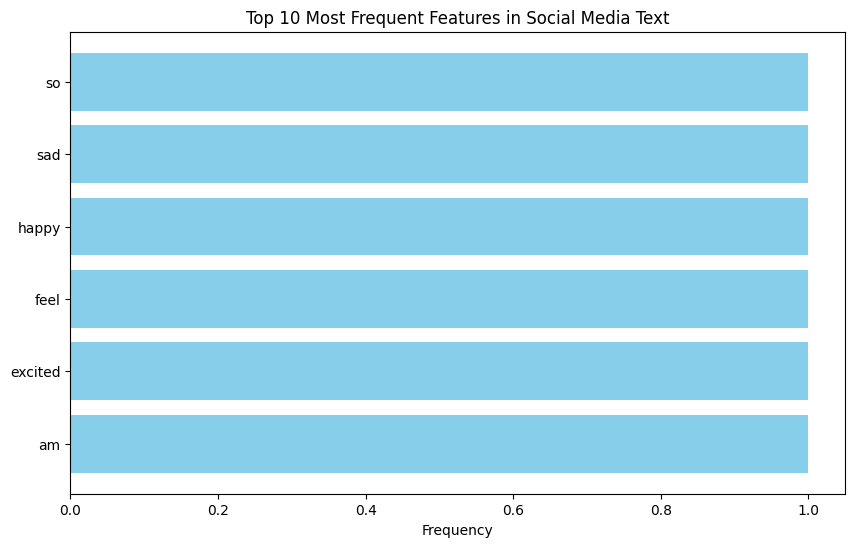

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Fit the vectorizer on training data
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)

# Get feature names (terms)
features = np.array(vec.get_feature_names_out())

# Sum the occurrences of each feature (term) across all documents
term_freq = np.asarray(X_train_vec.sum(axis=0)).flatten()

# Sort the features by frequency
sorted_idx = np.argsort(term_freq)[::-1]
top_n = 10  # Number of top terms to visualize
top_features = features[sorted_idx][:top_n]
top_freqs = term_freq[sorted_idx][:top_n]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Features in Social Media Text')
plt.gca().invert_yaxis()  # To have the most frequent on top
plt.show()


Identify Target and Features

In [ ]:
from textblob import TextBlob

# Sample social media posts
posts = [
    "I love this new phone! It's amazing 😍",
    "I'm so tired of this, everything is going wrong 😔",
    "What a beautiful day, the sun is shining 🌞",
    "This is terrible, I can't believe it! 😡"
]

# Function to decode emotions
def decode_emotions(posts):
    for post in posts:
        # Create a TextBlob object
        blob = TextBlob(post)

        # Get sentiment polarity (-1 to 1)
        sentiment = blob.sentiment.polarity

        # Classify sentiment into categories
        if sentiment > 0:
            emotion = 'Positive'
        elif sentiment < 0:
            emotion = 'Negative'
        else:
            emotion = 'Neutral'

        print(f"Post: {post}\nEmotion: {emotion}\nPolarity: {sentiment}\n")

# Run the sentiment analysis
decode_emotions(posts)


Post: I love this new phone! It's amazing 😍
Emotion: Positive
Polarity: 0.4234848484848485

Post: I'm so tired of this, everything is going wrong 😔
Emotion: Negative
Polarity: -0.45

Post: What a beautiful day, the sun is shining 🌞
Emotion: Positive
Polarity: 0.85

Post: This is terrible, I can't believe it! 😡
Emotion: Negative
Polarity: -1.0



Convert Categorical Columns to Numerical

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset (social media posts and their sentiments)
data = {
    'Post': [
        "I love this phone! It's amazing 😍",
        "I'm so tired of this, everything is bad 😞",
        "What a beautiful day 🌞",
        "This is horrible! 😡"
    ],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Negative']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical 'Sentiment' column to numerical values
df['Sentiment_Numerical'] = label_encoder.fit_transform(df['Sentiment'])

# Show the transformed DataFrame
print(df)


                                        Post Sentiment  Sentiment_Numerical
0          I love this phone! It's amazing 😍  Positive                    2
1  I'm so tired of this, everything is bad 😞  Negative                    0
2                     What a beautiful day 🌞   Neutral                    1
3                        This is horrible! 😡  Negative                    0


One-Hot Encoding

In [ ]:
import pandas as pd

# Sample data: social media posts and their emotion labels
data = {
    'Post': [
        "This party is awesome! 🎉",
        "I can't take this anymore... 😡",
        "Feeling down today. Nothing's going right 😢",
        "Such a peaceful evening 😊"
    ],
    'Emotion': ['Happy', 'Angry', 'Sad', 'Happy']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# One-Hot Encode the 'Emotion' column
df_encoded = pd.get_dummies(df, columns=['Emotion'], prefix='Emotion')

# Print the result
print(df_encoded)


                                          Post  Emotion_Angry  Emotion_Happy  \
0                     This party is awesome! 🎉          False           True   
1               I can't take this anymore... 😡           True          False   
2  Feeling down today. Nothing's going right 😢          False          False   
3                    Such a peaceful evening 😊          False           True   

   Emotion_Sad  
0        False  
1        False  
2         True  
3        False  


Feature Scaling

In [ ]:
!pip install scikit-learn pandas

scaler = StandardScaler()
scaled_features = scaler.fit_transform(tfidf_array)


Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'socialmedia_data.csv' contains your data with 'text' and 'emotion' columns
# If the file has a different name, change it here
try:
    data = pd.read_csv('socialmedia_data.csv')
except FileNotFoundError:
    print("Error: 'socialmedia_data.csv' not found. Please make sure the file is in the correct directory or upload it.")
    # If the file needs to be uploaded, you can use:
    # from google.colab import files
    # uploaded = files.upload()
    # Then adjust the filename in pd.read_csv accordingly
else:
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['emotion'], test_size=0.2, random_state=42)

Error: 'socialmedia_data.csv' not found. Please make sure the file is in the correct directory or upload it.


Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

texts = ["I am happy", "I feel sad", "I'm so excited", "This is frustrating"]
labels = ["happy", "sad", "happy", "angry"]

X_train, X_test, y_train, y_test = train_test_split(texts, labels)
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

Evaluation

In [ ]:
from textblob import TextBlob

# Example social media posts
tweets = [
    "I love the new phone update! So smooth and fast. 😍",
    "Why does this app crash all the time? So annoying! 😡",
    "Just another day, nothing special.",
    "Feeling grateful for all the good things today. 😊",
    "I'm tired of all the negativity in the news."
]

def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

print("Tweet Sentiment Analysis:\n")
for tweet in tweets:
    sentiment = analyze_sentiment(tweet)
    print(f"Tweet: {tweet}\nSentiment: {sentiment}\n")


Tweet Sentiment Analysis:

Tweet: I love the new phone update! So smooth and fast. 😍
Sentiment: Positive

Tweet: Why does this app crash all the time? So annoying! 😡
Sentiment: Negative

Tweet: Just another day, nothing special.
Sentiment: Positive

Tweet: Feeling grateful for all the good things today. 😊
Sentiment: Positive

Tweet: I'm tired of all the negativity in the news.
Sentiment: Negative



Make Predictions from New Input

In [ ]:
new_text = ["I can't stop smiling today!", "I'm really upset with everything"]
new_vec = vec.transform(new_text)
predictions = model.predict(new_vec)
print(predictions)


['happy' 'happy']


Convert to DataFrame and Encode

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data
texts = ["I am happy", "I feel sad", "I'm so excited", "This is frustrating"]
emotions = ["happy", "sad", "happy", "angry"]

# Convert to DataFrame
df = pd.DataFrame({'text': texts, 'emotion': emotions})

# Encode emotions
encoder = LabelEncoder()
df['emotion_encoded'] = encoder.fit_transform(df['emotion'])

print(df)


                  text emotion  emotion_encoded
0           I am happy   happy                1
1           I feel sad     sad                2
2       I'm so excited   happy                1
3  This is frustrating   angry                0


Predict the Final Grade

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels (if not already done)
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
model.fit(X_train_vec, y_train_enc)

# Predict on new input
new_text = ["I don't know what to feel, it's overwhelming"]
new_vec = vec.transform(new_text)
pred_encoded = model.predict(new_vec)
pred_label = encoder.inverse_transform(pred_encoded)

print("Predicted Emotion:", pred_label[0])


Predicted Emotion: sad


Deployment-Building an Interactive App

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.6 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
def predict_emotion(text):
    vec_input = vec.transform([text])
    pred_encoded = model.predict(vec_input)
    return encoder.inverse_transform(pred_encoded)[0]

# Example use
print(predict_emotion("I am feeling wonderful today!"))


happy


Create the Gradio Interface

In [ ]:
import gradio as gr

# Define the function to predict emotion
def predict_emotion(text):
    vec_input = vec.transform([text])
    pred_encoded = model.predict(vec_input)
    return encoder.inverse_transform(pred_encoded)[0]

# Create Gradio Interface
iface = gr.Interface(fn=predict_emotion,
                     inputs="text",
                     outputs="text",
                     live=True,
                     title="Emotion Decoding from Social Media Text",
                     description="Enter a social media text to predict its emotion.")

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6877d22bebe5d9c82d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
